In [1]:
from nufeb_tools import utils,plot
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from joblib import Parallel, delayed
from tqdm import tqdm

In [2]:
DIR = Path(f'D:/runs/population-stability')
folders = [path for path in DIR.iterdir() if path.is_dir()]



In [3]:
data = [utils.get_data(directory=str(folder)) for folder in tqdm(sorted(folders))]

100%|██████████| 24/24 [06:39<00:00, 16.66s/it]


In [4]:
sucs = [x.sucRatio for x in data]
sorted(sucs)
sucs=sorted(list(set(sucs)))

In [5]:
sucs.index(20)

0

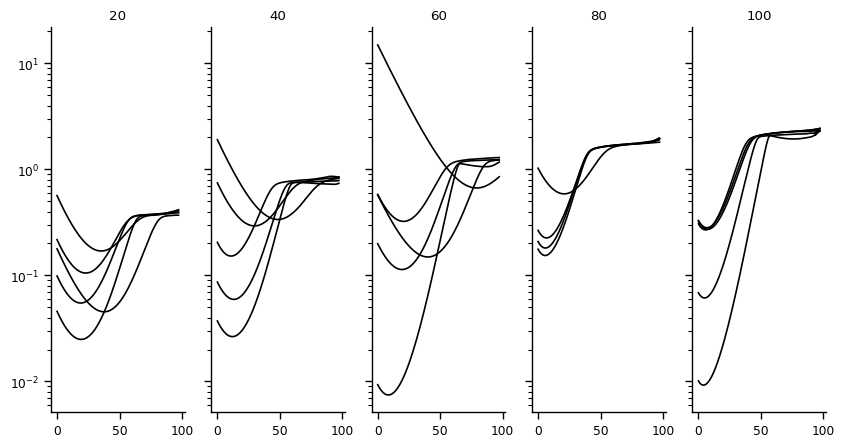

In [27]:
sns.set_context('paper')
f,axes = plt.subplots(ncols=len(sucs),sharey=True,sharex=True,figsize=(10,5))
for x in data:

    axes[sucs.index(x.sucRatio)].plot(x.biomass['ecw']/x.biomass['cyano'],c='k')
    axes[sucs.index(x.sucRatio)].set_title(x.sucRatio)
for ax in axes.ravel():
    ax.set_yscale('log')
sns.despine()
plt.show()

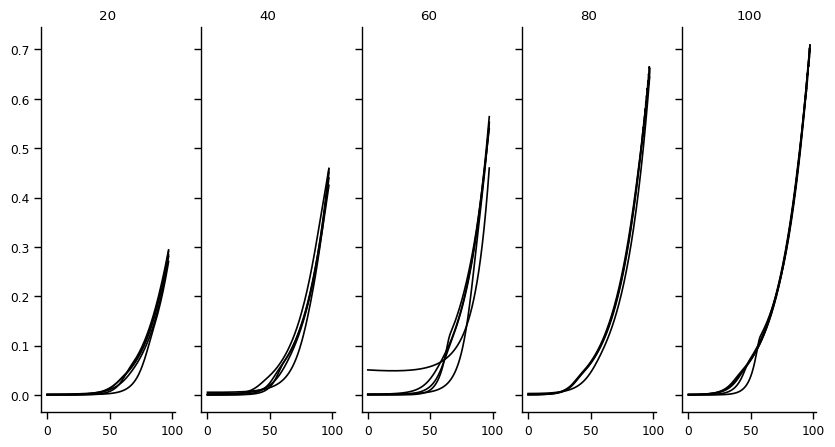

In [33]:
sns.set_context('paper')
f,axes = plt.subplots(ncols=len(sucs),sharey=True,sharex=True,figsize=(10,5))
for x in data:

    axes[sucs.index(x.sucRatio)].plot((x.biomass['ecw'])/(x.biomass['ecw'].iloc[-1]+x.biomass['cyano'].iloc[-1]),c='k')
    axes[sucs.index(x.sucRatio)].set_title(x.sucRatio)

sns.despine()
plt.show()

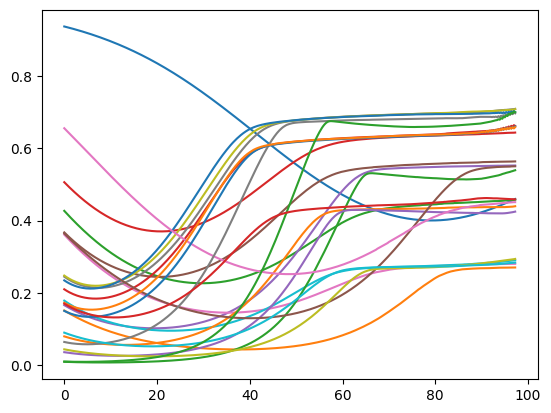

In [7]:
f,ax = plt.subplots()

[plt.plot(x.biomass['ecw']/(x.biomass['cyano']+x.biomass['ecw'])) for x in data]

plt.show()

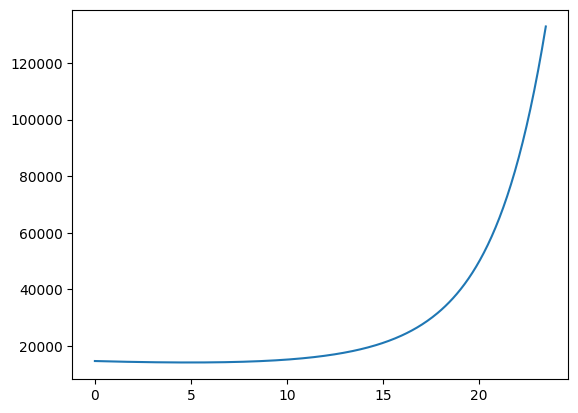

In [8]:
t_cec= 1//data[0].metadata['ecw']['GrowthRate']
t_cse = 1/data[0].metadata['cyano']['GrowthRate']
t_ec = data[0].biomass.reset_index()['Hours']*3600/t_cec
t_se = data[0].biomass.reset_index()['Hours']*3600/t_cse
f,ax = plt.subplots()

plt.plot(t_ec,data[0].biomass.reset_index()['ecw'])

plt.show()

In [19]:
df = pd.DataFrame(columns=['Hours','cyano','ecw','sucRatio'])
for x in data:
    temp = x.biomass.reset_index()[['Hours','cyano','ecw']]
    temp.loc[:,'sucRatio'] = x.sucRatio
    df=df.append(temp,ignore_index=True)
df.loc[:,'pop_ratio'] = df.ecw/df.cyano

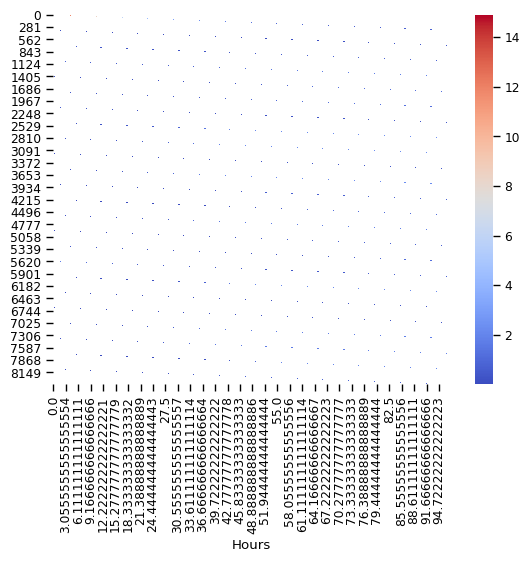

In [25]:
piv = df.pivot_table(index=df.index,columns='Hours',values='pop_ratio')
sns.heatmap(piv, cmap='coolwarm')
plt.show()

In [ ]:
        piv = rates.pivot_table(index='id',columns='time', values='rate')
        g = sns.heatmap(piv, cmap='coolwarm',ax=axes[ct-1])
        cbar = g.collections[0].colorbar
        cbar.ax.set_ylabel(r'Growth rate ($\frac{fg}{hr}$)')
        #axes[ct-1].xaxis.set_major_locator(plt.MaxNLocator(5))
        axes[ct-1].set_xticklabels(axes[ct-1].get_xticklabels(), rotation=0) 
        axes[ct-1].locator_params(axis="x", nbins=6)
        axes[ct-1].set_xlabel('Time (hrs)')